In [159]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [160]:
#Carregando os dados
titanic_treino = pd.read_csv('train.csv')
titanic_teste = pd.read_csv('test.csv')

In [161]:
#Vendo se deu certo
titanic_treino.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [162]:
#tamanho do csv

titanic_treino.shape

(891, 12)

In [163]:
#Survival = (0 = Não; 1 = Sim)
#Pclass = Classe de escolha (1, 2, 3)
#SibSp = Irmãos e cônjuges a bordo
#Parch = Pais e filhos a bordo
#Fare = Taxa de embarque (Libras esterlinas)
#Embarked = Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

In [164]:
#Informações extras

titanic_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [165]:
#Informações sobre o csv (Tipo de dados, quantos valores não estão vazios)

titanic_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
#Quantos % dos homens e mulheres sobreviveram

mulher = titanic_treino.loc[titanic_treino.Sex == 'female']["Survived"]
porcentagemMulheres = sum(mulher)/len(mulher)

print("% de quantas mulheres sobreviveram:", porcentagemMulheres)

homem = titanic_treino.loc[titanic_treino.Sex == 'male']["Survived"]
porcentagemHomens = sum(homem)/len(homem)

print("% de quantos homens sobreviveram:", porcentagemHomens)

% de quantas mulheres sobreviveram: 0.7420382165605095
% de quantos homens sobreviveram: 0.18890814558058924


In [167]:
#Tabelinha dessa porcentagem pra ficar bonito

titanic_treino.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [168]:
#Quantos sobreviveram ao total

titanic_treino['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

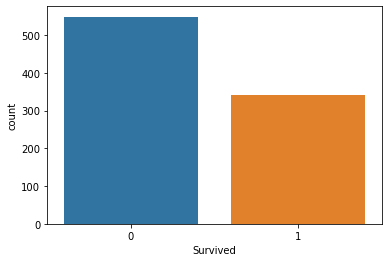

In [169]:
#Grafico pra ficar bonito

sns.countplot(titanic_treino['Survived'],label="Quantidade de mortos e vivos")

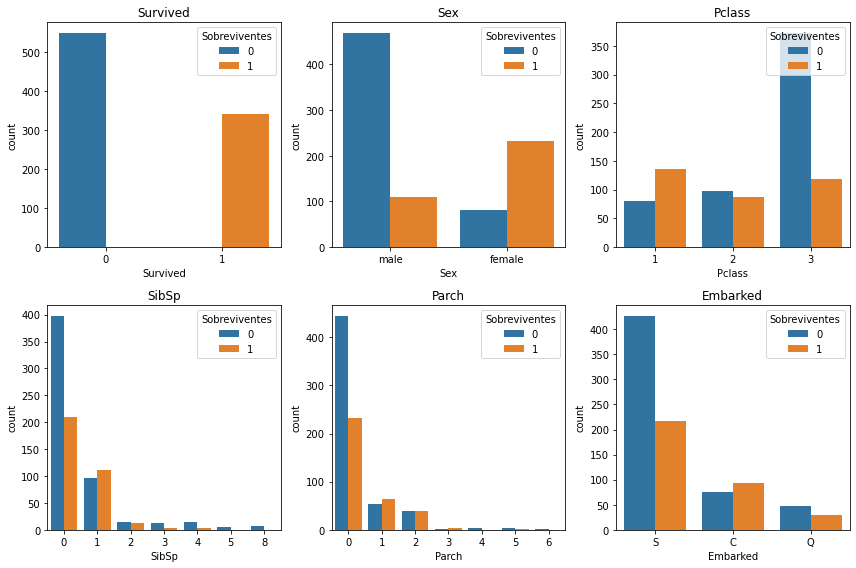

In [170]:
#Grafico de sobreviventes em relação as outras colunas

cols = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

n_rows = 2
n_cols = 3

# A grade subplot e o tamanho da figura de cada gráfico
# Isso retorna uma imagem (fig) e os eixos Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*4,n_rows*4))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #Percorre colunas       
        ax = axs[r][c] #Posição de cada subplot
        sns.countplot(titanic_treino[cols[i]], hue=titanic_treino["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Sobreviventes", loc='upper right') 
        
plt.tight_layout()   #tight_layout

In [171]:
#tebela da taxa de sobreviventes do Sexo X Classes

titanic_treino.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [172]:
#Tabela da taxa de sobreviventes em relação ao Sexo, Idade e Classe.
#Idade dividida em 2 grupos
age = pd.cut(titanic_treino['Age'], [0, 18, 80])
titanic_treino.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

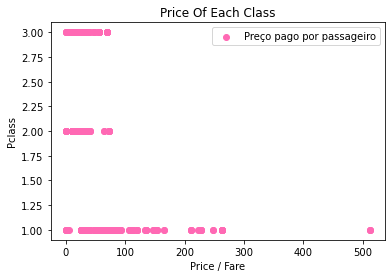

In [173]:
#Plot dos preços pagados por cada passgeiro de cada classe
plt.scatter(titanic_treino['Fare'], titanic_treino['Pclass'],  color = 'hotpink', label='Preço pago por passageiro')
plt.ylabel('Pclass')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [174]:
#Separando valores que irão impactar

features= [ 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic_treino[features]
y = titanic_treino['Survived']

In [175]:
#Quantas posições vazias tem cada coluna da tabela

x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [176]:
##Now fill the null values
x['Age'] = x['Age'].fillna(x['Age'].median())
x['Embarked']= x['Embarked'].fillna(x['Embarked'].value_counts().index[0])

<ipython-input-176-5a46533fae8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'] = x['Age'].fillna(x['Age'].median())
<ipython-input-176-5a46533fae8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Embarked']= x['Embarked'].fillna(x['Embarked'].value_counts().index[0])


In [177]:
#Removendo a coluna muito vazias ou indiferentes

##titanic_treino = titanic_treino.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [178]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [179]:
#Valores possiveis nas colunas não numericas
print(x['Sex'].unique())
print(x['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [180]:
#Mudando ass variaveis não numericas de Sex e Embarked para valores numericos

#Encoding categorical data values (Transforming object data types to integers)
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
x['Sex'] = LE.fit_transform(x['Sex'])
x['Embarked'] = LE.fit_transform(x['Embarked'])

<ipython-input-180-dd1ecd8131f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex'] = LE.fit_transform(x['Sex'])
<ipython-input-180-dd1ecd8131f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Embarked'] = LE.fit_transform(x['Embarked'])


In [181]:
#Novos valores possiveis das colunas
print(x['Sex'].unique())
print(x['Embarked'].unique())

[1 0]
[2 0 1]


In [182]:
# Male = 1 | Female = 0
# S = 2, C = 0, Q = 1

In [183]:
#80% do banco de dados para treino e 20% para teste

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

In [184]:
#Usando o modelo de random florest agora para analisar os dados
#https://gist.github.com/BetterProgramming/efec68d9ee0aeb988aa73abf74560ff7#file-models-py

def modelo(x_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)
    print('[0]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))
    return forest

In [185]:
classifier = modelo(x_train,y_train)

[0]Random Forest Classifier Training Accuracy: 0.9648876404494382


# Validação cruzada

In [186]:
scores = cross_val_score(classifier, x, y, cv=10, scoring='accuracy')

In [187]:
scores

array([0.74444444, 0.80898876, 0.75280899, 0.83146067, 0.83146067,
       0.79775281, 0.82022472, 0.78651685, 0.82022472, 0.83146067])

In [188]:
scores.mean()

0.802534332084894

In [385]:
#Agora tá na hora de testar no titanic_teste

# Partindo para o CSV de teste

In [189]:
test_data = pd.read_csv('test.csv')
test_x = test_data[features]

In [190]:
##Let's fill values
test_x['Age'] = test_x['Age'].fillna(test_x['Age'].median())
test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].median())

<ipython-input-190-ff2ebf39c0dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Age'] = test_x['Age'].fillna(test_x['Age'].median())
<ipython-input-190-ff2ebf39c0dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Fare'] = test_x['Fare'].fillna(test_x['Fare'].median())


In [191]:
##Let's enocde categorical values
test_x['Sex'] = LE.fit_transform(test_x['Sex'])
test_x['Embarked'] = LE.fit_transform(test_x['Embarked'])

<ipython-input-191-9e82c8fb3498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Sex'] = LE.fit_transform(test_x['Sex'])
<ipython-input-191-9e82c8fb3498>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Embarked'] = LE.fit_transform(test_x['Embarked'])


In [192]:
##Now we predict the values
prediction = classifier.predict(test_x)

In [194]:
##Now according to rules we have to store a prediction in csv file
output = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived': prediction})
output.to_csv('submission.csv', index=False)
output.head()
##Submission.csv is a file which we have to submit in a competition

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
